<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019 (Solved using Finesse 3)
</div>


# Introduction to Jupyter Notebooks, Pykat, and Finesse

## Installing Software

You have already received instructions on how to install Python, Pykat, Finesse, and a link to the pages that this notebook is based off already. If these did not install correctly we will find out today and can hopefully fix that.

## Let's Get Started: Python and Jupyter Notebooks
Most of you are already familiar with the *Python* programming language, and some with *Jupyter* notebooks. For anybody unfamiliar with either, we have provided some basic introduction and links for more information below. Even if you already know Python / Jupyter, it's a good idea to have a quick look through this as a refresher.
 
### Python
 <a href="https://www.python.org/">Python</a> is a powerful programming language which is particularly useful for fast development and scripting. We will use only a very small subset of Python's functionality. In particular, we will do simple mathematical operations using the package <a href="http://www.numpy.org/">Numpy</a>, some simple string operations, and we will plot output data.

We recommend that you do **not** try to learn Python in general right now, but search the web for a solution for each particular task. A good starting point, for example, is the <a href="http://nbviewer.ipython.org/gist/rpmuller/5920182">A Crash Course in Python for Scientists</a>.

More info can be found in:
  * The <a href="https://docs.python.org/2/tutorial/">Python tutorial</a>
  * The <a href="http://wiki.scipy.org/Tentative_NumPy_Tutorial">Numpy tutorial</a>
  
### The Jupyter Notebook

#### Getting started

We will start every notebook by loading PyKat and the other Python packages we will need. These are explained in more detail below.

(type `shift`+`enter` to run)

In [ ]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

#### Text Cells

These cells are just text, fomatted using *Markdown*: http://daringfireball.net/projects/markdown/syntax. **Double-click** on a text cell to edit it.

You can also use <span style="color:green;">HTML commands</span> and Latex commands (for example:  $\Delta L = L_X - L_Y$) in the markdown cells.

For any optical simulation it is very useful to prepare a sketch of the optical layout. We typically use <a href="https://inkscape.org">Inkscape</a> and the <a href="http://www.gwoptics.org/ComponentLibrary/">ComponentLibrary</a> to prepare such sketches as Scalable Vector Graphics (svg files). You can insert images into notebooks in several ways, for example using HTML commands inside a text cell like this:

<img src="http://www.gwoptics.org/images/finesse_box_100px.png">

You can also link to local image files in the same way.

#### Code Cells
Code cells are the main element in the Jupyter notebook. When you press '`shift`+`enter`' the content of the cell will be evaluated as Python code and an output cell is created to display the result, see the simple examples below.

In [ ]:
# Adding numbers
a=5
b=20
print(a+b)

In [ ]:
# Joining strings together
one='red '
two='car'
print(one+two)

In [ ]:
# Outputting sentences
r = 2
area = r**2
print("This is a good way to present results: The area is {0:.1f} km^2".format(area))

#### Plotting
  
Python provides a number of powerful plotting packages. We will be using inline plots based on the 'matplotlib' package. Examples and documentation can be found online, for example a <a href="http://nbviewer.ipython.org/gist/yymm/6805429">notebook with good plotting examples</a>, or this <a href="http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb"> extensive lecture on plotting</a>. Below is the code for a simple example:

In [ ]:
# create a data vector with 10 elements
x=np.linspace(1, 100, 10) 

print("x = {0}".format(x))

y = x*x

plt.plot(x, y)
plt.title('A simple function')
plt.xlabel('x [some units]')
plt.ylabel('y [some other units]')

**Important**: If your plots are looking too big or too small then you will need to change the DPI setting to suit your monitor. At the top of this page is a line of code that looks like `pykat.init_pykat_plotting(dpi=90)`, either increase of decrease this to find a scaling that suits you.

## Finesse and Pykat

<a href="http://www.gwoptics.org/finesse">Finesse</a> is an interferometer simulation software, developed for the design and commissioning of laser-interferometric gravitational wave detectors. As such it is optimised for modelling the main interferometers of LIGO, Virgo, GEO etc, but it is also a simple and versatile tool to learn basic laser optics. Examples and an extensive manual for Finesse can be found on the <a href="http://www.gwoptics.org/finesse">Finesse page</a>.

<a href="http://www.gwoptics.org/pykat">PyKat</a> is a Python wrapper for the interferometer simulation Finesse. This allows us to **run Finesse** from an Jupyter notebook. The main advantage of using Finesse in this way is that Python offers the ability to do **post-processing of the Finesse output** very easily in the notebook. 

You should have a read of these notebooks: 
- <a href='./Finesse.ipynb'>Finesse notebook</a>
- <a href='./Pykat.ipynb'>Pykat notebook</a> - this should be used as a reference on how to use Pykat throughout this school.

### Simple Finesse and Pykat Example
Here we construct a simple Finesse model of a laser beam shining on a mirror. In this simulation we just vary the input laser power and see how much is reflected and transmitted. To measure the laser power we put two photodiodes on reflection and transmission at the mirror.

In [ ]:
kat = finesse.kat()
kat.verbose = False

code = """
l laser1 1.0 0 n1 
s s1 0 n1 n2

pd Prefl n2
pd Ptran n3

m m1 0.9 0.1 0 n2 n3

xaxis laser1 P lin 0 1 10
yaxis abs 
"""

kat.parse(code)

out1 = kat.run()

The data can be plotted in multiple ways. If quickly want to see the results we suggest using the builtin plotting command for the output:

In [ ]:
# Plotting the results of an output can be done using the builtin command
fig = out1.plot()

This will produce a plot using all the detectors enabled in the model. It should be noted that the yaxis units is [au] because multiple quantities can be shown at the same time. For example, a beam's power in Watts can be plotted along with the size of a beam. Thus to infer the units of a trace you must look at what type of detector has been used.

The builtin plotting function has many options that can be set to customise the plot. For more examples on using this please see the notebook on <a href="pykat_plotting.ipynb" target="_blank">plotting</a>.

However, if you would rather make a plot yourself you can always just use matplotlib commands as per usual:

In [ ]:
plt.plot(out1.x, out1["Prefl"], label="Refl")
plt.plot(out1.x, out1["Ptran"], label="Tran")

plt.xlim(out1.x.min(), out1.x.max())

plt.ylabel("Power [W]")
plt.xlabel("Laser power [W]")
plt.legend()

The `out` object returned by `run()` command is an important one as it contains all the results from the simulation. It is important to remember that when Finesse outputs some results it is just an array of numbers: the number of steps in the simulation set with the `xaxis` and the outputted value of each of the detectors you have added.

You can see the raw outputs with:

In [ ]:
print(out1.x) # show the xaxis values
print(out1.y) 

As you can see, they are quite long and not easily readable. Here we just have one detector, however, if we have more we would have more columns of data. To find out which column is which you need to look at the `out.ylabels` array:

In [ ]:
print(out1.ylabels)

However, the recommended method for accessing the values of a particular detector is by using the detector's name as shown here:

In [ ]:
out1["Prefl"]

## Tasks
In each notebook we will provide some tasks for you to complete. In each task section you should add your code you write to complete the task. After the sessions we will have a show and tell from some students about how they did each task.

You should **help each other**, **work in groups**, organise yourselves and don't forget to ask for help if needed!

<div style="background-color:#cceffc;padding:10px;">

### Task:  Copy and run an exisiting Finesse example

First, let's just get up and running by trying something simple. Don't worry about understanding any physics here, this example is just about getting something running correctly before we proceed.

**(a)** Copy the Finesse code for <a href="http://www.gwoptics.org/finesse/examples/mirror_shake.php">radiation pressure effects</a> from the Finesse pages.

**(b)** Load this into a `kat` object as shown above and run it

**(c)** Plot all of the outputs
</div>

In [1]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Optical setup: laser, space and mirror:
    l l1 P=1
    s s1 l1.p1 m1.p1
    m m1 R=1 T=0

    # Define a pendulum for our mirror, with a z-motion resonance at 10Hz
    # and Q factor of 1000
    pendulum sus1 m1.mech mass=1 fz=10 Qz=1000

    # Measure the mirror's longitudinal motion
    xd m1_z m1.mech.z

    # Set a signal frequency to activate the signal simulation
    # (needed for radiation pressure effects to be observed)
    fsig(1)

    # Generate amplitude modulation at the laser
    sgen sig l1.amp

    # Sweep the frequency of the amplitude modulation
    xaxis(fsig.f, log, 1, 100, 400)
    """
)

C:\Users\91938\anaconda3\envs\finesse\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


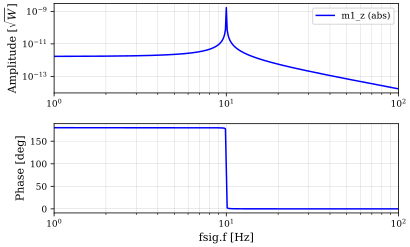

In [2]:
out = kat.run()
out.plot(log=True);


# Beams and Mirrors 

It's finally time to start modelling! These first tasks are designed to get you accquainted with some of the basic features of how Finesse works, and how it relates to the physics you have just reviewed in the previous notebooks. Here we will just look at a laser and mirror component and how the optical field behaves. 

The tasks will involve several steps each. This will usually be looking up how to write Finesse commands, forming a Finesse model, running the simulation with Pykat, and then relating the results you see back to the theory from the lectures.

Remember, these tasks are meant to get you thinking and comparing to the theory you have learned. Talk to your fellow students and ask lots of questions! 

## Goal of the session
**Finesse/Pykat things you will learn**:
 - How to approach building a model
 - How to vary a parameter and plot the resulting output

## Getting Started

We start by loading PyKat and the other Python packages we will need:

(type shift+enter to run)

In [ ]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

## Tasks

<div style="background-color:#cceffc;padding:10px;">

### Task 1: Laser and a mirror

Write the Finesse code to model a laser outputting 10W of power that is incident on a mirror 1m away. The mirror should reflect 80% of the light and transmit 20%. 
</div>

You'll find the following references useful:
- <a href="http://www.gwoptics.org/finesse/reference/">Finesse online syntax reference</a>
- <a href="http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf">Finesse Manual</a>


You should write your Finesse code in a multi-line string variable, for example:
```python
code = """
This
is a
multi-line
string
"""
```
Each line should contain one Finesse command.

<div style="background-color:#cceffc;padding:10px;">

### Task 2: Laser and a mirror kat object

1.  Create a `kat` object and add the Finesse code you created in Task 1 to it using the `kat.parse` function.


2.  Add two photo diodes to measure the optical power reflected and transmitted at the mirror.

</div>

<div style="background-color:#cceffc;padding:10px;">

### Task 3: Power conservation

Using the kat object above, set `kat.noxaxis = True`. This tells Finesse to compute just one data point for our model and not change any parameters. You can also set `kat.verbose = False` to stop it from printing information when the simulation is running.

1.  Run this kat object to get the simulation output.


2. Does the reflected and transmitted power match up with the input power?

</div>

In [4]:
import finesse
bam=finesse.Model()
bam.parse("""
l Laser P=10
s space Laser.p1 mirror.p1 L=1
m mirror R=0.8 T=0.2
pd transpower mirror.p2.o
pd reflecpower mirror.p1.o
noxaxis()
""")
result=bam.run()
print("Reflected Power + Transmitted Power = Total Incident Power")
print(result["reflecpower"], "+", result["transpower"],"= 10W")

Reflected Power + Transmitted Power = Total Incident Power
8.0 + 2.0 = 10W


<div style="background-color:#cceffc;padding:10px;">

### Task 4: Complex fields

The optical field has both an amplitude and a phase. We can output this in Finesse using the amplitude detector (`ad`).

For this task you should look up the syntax for the `ad` detector. 

**Hint:** the frequency given in the `ad` detector is relative to the default optical frequency $f = c/1064$nm. You can see what the default wavelength is using `kat.lambda0`. 


1. Add three amplitude detectors: one looking at the beam going into the mirror, one looking at the reflected field, and another looking at the transmitted field. Add the command `yaxis abs:deg` to output a complex number from Finesse so we can get the magnitude and phase of the field.


2. Run the kat object and print the magnitude and phases of the optical fields. What is the difference in phase from the incident field to the reflected field and incident field to tranmitted field? Why is the phase different on transmission?


3. What units do the `pd` and `ad` detector outputs in Finesse have?

</div>

In [3]:
import cmath 
import math
import finesse
bam2=finesse.Model()
bam2.parse("""
l Laser P=10 f=0
s space Laser.p1 mirror.p1 L=1
m mirror R=0.8 T=0.2
ad Incident mirror.p1.i f=0
ad Reflected mirror.p1.o f=0
ad Transmitted mirror.p2.o f=0
noxaxis()
""")
result=bam2.run()
phase_Incident=cmath.phase(result["Incident"])*180/math.pi
phase_Reflected=cmath.phase(result["Reflected"])*180/math.pi
phase_Transmitted=cmath.phase(result["Transmitted"])*180/math.pi
print("Change in Phase for the Reflected Light field: ", phase_Reflected-phase_Incident)
print("Change in Phase for the Transmitted Light field: ", phase_Transmitted-phase_Incident)
print("Amplitude_Incident=",abs(result["Incident"]))
print("Amplitude_Reflected=",abs(result["Reflected"]))
print("Amplitude_Transmitted=",abs(result["Transmitted"]))
print("Phase of the Incident field:",phase_Incident)
print("Phase of the Reflected field:",phase_Reflected)
print("Phase of the Transmitted field:",phase_Transmitted)


Change in Phase for the Reflected Light field:  0.0
Change in Phase for the Transmitted Light field:  90.0
Amplitude_Incident= 3.1622776601683795
Amplitude_Reflected= 2.8284271247461903
Amplitude_Transmitted= 1.4142135623730951
Phase of the Incident field: 0.0
Phase of the Reflected field: 0.0
Phase of the Transmitted field: 90.0


We can observe that the Reflected Field does not have a phase change whereas the transmitted field is phase shifted by $\frac{\pi}{2}$ radians.<br>
We can also observe that Amplitude_Reflected = $\sqrt{0.8}$Amplitude_Incident and Amplitude_Transmitted=$\sqrt{0.2}$Amplitude_Incident.

#### Lengths and tunings

One of the most crucial aspects in optical interferometery is accurately positioning mirrors. The optical wavelengths we use in gravitational wave detectors is $\lambda=1064$nm. Typically we are interested in either **macroscopic** positioning, such as a mirror is 1m, 1cm, 1mm, etc. away, or in **microscopic** positions which are fractions of $\lambda$. The resonance condition of a Fabry-Perot cavity requires its length to be an integer number of half-wavelengths. For the light of an Nd:YAG laser, length differences $\ll \lambda=1064$nm are of interest. Some orders of magnitude:
  * LIGO peak senitivity in meters: $\sim 10^{-20}$ m
  * LIGO cavity mirror postion control accuracy: $< 10^{-12}$ m
  * LIGO arm cavity length: $\sim 10^3$ m
  * Relative numerical accuracy of floating point numbers: $10^{-15}$

As we can see there are many orders of magnitude difference between the lengths of cavities and the types of signal we might measure. With such a large dynamic range typical floating point variables used in computers cannot represent this. Thus we break lengths up into macroscopic and microscopic lengths. The length given by the `space` component is macroscopic and is always rounded to the nearest interger number of $\lambda$.

We change the microscopic length differences in Finesse by changing a mirror's *tuning* value. Tuning is usually refered to in units of degrees, with 360 degrees $= \lambda$. So a tuning of 180 degrees means we have moved the mirror by half a wavelength.
You can read more about this in the Living Review, section 2.5, "Lengths and tunings: numerical accuracy of distances".

<div style="background-color:#cceffc;padding:10px;">

### Task 5: Mirror positions, or tunings

The aim of this task is to think about the phase relationships Finesse uses, as this is important to grasp for later tasks.

1. Using your `kat` object from before, change the mirror tuning by 90 degrees. How did the phase of the reflected and transmitted fields change relative to the incident field?


2. If you change the tuning by 360 degrees, do the amplitudes of the optical fields change?


3. If you change the length of the space between the mirror and laser, does it affect the phase?

</div>

In [5]:
bam2.mirror.phi+=90
result=bam2.run()
result=bam2.run()
phase_Incident=cmath.phase(result["Incident"])*180/math.pi
phase_Reflected=cmath.phase(result["Reflected"])*180/math.pi
phase_Transmitted=cmath.phase(result["Transmitted"])*180/math.pi
print("Change in Phase for the Reflected Light field: ", phase_Reflected-phase_Incident)
print("Change in Phase for the Transmitted Light field: ", phase_Transmitted-phase_Incident)
print("Amplitude_Incident=",abs(result["Incident"]))
print("Amplitude_Reflected=",abs(result["Reflected"]))
print("Amplitude_Transmitted=",abs(result["Transmitted"]))
print("Phase of the Incident field:",phase_Incident)
print("Phase of the Reflected field:",phase_Reflected)
print("Phase of the Transmitted field:",phase_Transmitted)

Change in Phase for the Reflected Light field:  180.0
Change in Phase for the Transmitted Light field:  90.0
Amplitude_Incident= 3.1622776601683795
Amplitude_Reflected= 2.8284271247461903
Amplitude_Transmitted= 1.4142135623730951
Phase of the Incident field: 0.0
Phase of the Reflected field: 180.0
Phase of the Transmitted field: 90.0


We can observe that there is no difference in the phase shift of the transmitted field, whereas there is a $180^{o}$ shift in the reflected field. This is because the reflected field has to travel an additional length of $\frac{\lambda}{2}$ , during its propagation.

<div style="background-color:#cceffc;padding:10px;">

### Task 6: Scanning parameters

So far we have just run a single data point in our simulations. Usually we want to change some thing and see how the outputs vary, and we will be doing this a lot in the coming notebooks. In Finesse we vary parameters in a simulation using the `xaxis` command, this changes some parameter from one value to another and computes it for $N$ steps between them.

1. Look up the syntax for the `xaxis` command.


2. Add an `xaxis` command to change the input laser power from 1W to 10W in 20 steps.


3. Plot the reflected and transmitted powers.


4. Does the sum of reflected and transmitted power always equal the input power?

</div>

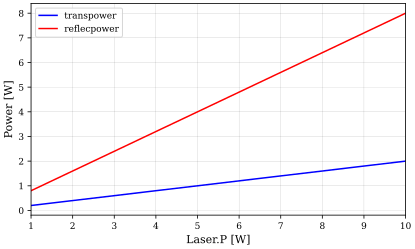

( 0.2 0.8 1.0 )
( 0.29 1.16 1.45 )
( 0.37999999999999995 1.5199999999999998 1.8999999999999997 )
( 0.47 1.88 2.3499999999999996 )
( 0.5599999999999998 2.2399999999999993 2.799999999999999 )
( 0.6499999999999998 2.599999999999999 3.249999999999999 )
( 0.7399999999999999 2.9599999999999995 3.6999999999999993 )
( 0.8299999999999998 3.3199999999999994 4.1499999999999995 )
( 0.9199999999999997 3.679999999999999 4.599999999999999 )
( 1.0099999999999998 4.039999999999999 5.049999999999999 )
( 1.1 4.4 5.5 )
( 1.19 4.76 5.949999999999999 )
( 1.2799999999999998 5.119999999999999 6.399999999999999 )
( 1.37 5.48 6.8500000000000005 )
( 1.46 5.84 7.3 )
( 1.55 6.2 7.75 )
( 1.6399999999999995 6.559999999999998 8.199999999999998 )
( 1.73 6.92 8.65 )
( 1.82 7.28 9.1 )
( 1.9100000000000001 7.640000000000001 9.55 )
( 2.0 8.0 10.0 )


In [6]:
import finesse
finesse.configure(plotting=True)
bam3=finesse.Model()
bam3.parse("""
l Laser P=1
s space Laser.p1 mirror.p1 L=1
m mirror R=0.8 T=0.2
pd transpower mirror.p2.o
pd reflecpower mirror.p1.o
xaxis(Laser.P,lin,1,10,20)
""")
result=bam3.run()
result.plot()
for i in range(21):
    print("(",result[i][0],result[i][1],result[i][0]+result[i][1],")")

As expected, the Reflected and the Trasnmitted powers add up to the Incident power.

<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019
</div>


# Modelling a Fabry-Perot Cavity

In this notebook we'll be covering some basics of how to work more practically with <a href=http://www.gwoptics.org/finesse/>Finesse</a> and <a href =http://www.gwoptics.org/pykat/> PyKat</a>, by learning how to model a Fabry-Perot Cavity. Throughout the notebook are some explanations for both how to use Finesse/Pykat, and links to explanations of the relevant physics, if it's new to you.

This session is based on the GWoptics.org <a href=http://www.gwoptics.org/learn/index.html>Learn Laser Interferometry</a> course, with some extensions and adaptations. 

**Some key references**:
 - <a href=https://link.springer.com/article/10.1007/s41114-016-0002-8> Interferometer Techniques for Gravitational-Wave Detection</a>, C. Bond, D. Brown, A. Freise, and K. Strain, *Living Reviews in Relativity* 2016 
-- An extensive review (essentially a textbook) of laser interferometry techniques in the frequency domain used for detecting gravitational waves. It's written by developers and users of Finesse, so naturally covers the kinds of physics Finesse is able to model. It was updated in 2016 to include several new chapters, and is now available as a handy searchable html website (and you can copy-paste the latex equations).
 
 - <a href=http://www.gwoptics.org/finesse/reference/>Finesse Synatax reference</a>
-- Your best friend for finding the right way to code a beamsplitter, photodiode, etc in Finesse's own syntax (NB: not pykat).

 - <a href=http://www.gwoptics.org/finesse/reference/cheatsheet.php>Finesse Cheatsheet/FAQ</a>
-- The first place to look if you are confused about Finesse conventions or have other syntax or installation issues.
 
 - <a href=http://www.gwoptics.org/finesse/download/manual.pdf>Finesse 2 manual</a>, A. Freise, D. Brown, and C. Bond. 
--Manual for using Finesse 2, including both coded examples and some physics explanation along the way. 

## Goal of the session
Today you will model a 2-mirror optical cavity using a <a href = https://en.wikipedia.org/wiki/Plane_wave>plane-waves</a> model.

**Finesse/Pykat things you will learn**:
 - How to approach building a model
 - constructing an optical nodal network using Finesse syntax (the `kat` object)
 - using pykat to create, interact with and modify an existing `kat` object
 - some Finesse 'quirks', e.g. Finesse's definition of length

## Getting Started

We start by loading PyKat and the other Python packages we will need:

(type shift+enter to run)

In [ ]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
import scipy                     # for analysing the plots

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

## Planning the Model

The details that need including in your model will somewhat depend on the *purpose* of that model. E.g. an investigation exploring the effect of a lens on the spot size 3m further along the optical path does not necessarily need to include every flat mirror it reflects from along the way, but should include any other (de)focusing optics in that path. Therefore it is worth taking a few moments to plan the model before starting to code it.

 - what is the question your model is trying to answer? (and is Finesse the right tool to answer it?)
 - what plot/number will tell you that answer?
 - what parts of your experiment do you need to include for the result to be meaningful?

**Today's model**

Today, we will imagine we are designing a 2-mirror optical cavity which could be used, for example, as a mode-cleaner for a tabletop experiment.

You can learn more about 2-mirror cavities, also known as Fabry-Perot  cavities or interferometers, by reading <a href=https://link.springer.com/article/10.1007/s41114-016-0002-8#Sec33>section 5.1</a> of Interferometer Techniques for Gravitational-Wave Detection.

We will:
1. Construct a plane waves model of the cavity, plotting the power transmitted, reflected, and circulating from the cavity as its length is changed. 
2. Make the model more realistic using Gaussian beams and curved optics, then re-produce the powers plot to check that the behaviour still makes sense.
3. Plot the profile of the beam transmitted from the cavity.

## The Optical Layout

The setup we want to model is shown in the figure below. A *cavity*, or *optical resonator* is formed by the two partially-transparent mirrors M1 and M2. To measure the reflected, transmitted, and circulating power in the cavity, we add 3 photodiodes (these do not affect the beam propagation).

<img src=http://www.gwoptics.org/learn/02_Plane_waves/01_Fabry_Perot_cavity/fabry-perot.svg width=50%>

**The nodal network**

Finesse builds the optical model as a series of nodes, with component-specific instructions governing how light is propagated from one node to the next. It is recommended that you make a quick sketch of your setup, including these nodes, before you start coding your model - this is especially true for larger models. In our case we have:

```
                       M1                     M2
laser (n0) ------> (n1)|(n2) <----------> (n3)|(n4)
```

and will add photodiodes looking at the beams at nodes `n1` (refl), `n3` (circ) and `n4` (trans).


## Plane-Waves Finesse Model

<div style="background-color:#cceffc;padding:10px;">

### Task 1: write the base code for the optical model, and parse it to pykat
Fill in the blank '`basecode`' object below with the Finesse syntax commands for the setup sketched above, using the following components/parameters:
 * 1 W laser with 0 offset to the default wavelength (This is 1064nm in Finesse, unless you tell it otherwise)
 * a short space from laser to M1
 * mirrors 'M1' and 'M2' with T=0.15 and zero loss
 * a cavity length of 3km.
 
You may find the <a href=http://www.gwoptics.org/finesse/reference/>Finesse syntax reference</a> helpful! 
</div>

In [7]:
import finesse
model=finesse.Model()
model.parse("""
l laser P=1 f=0
s space laser.p1 mirror1.p1 L=1E-3
m mirror1 R=0.85 T=0.15
s cavity mirror1.p2 mirror2.p1 L=3000
m mirror2 R=0.85 T=0.15
""")

It is generally good practice to keep the core optical model in an object called `base` or `basekat`, then create independant copies of it that are used for each investigation. This ensures that `basekat` stays intact and doesn't unintentionally retain some test alteration like a change in reflectivity or length. It also ensures that `basekat` contains *just* the components you need for your model, without being slowed down by the inclusion of excess detectors etc. 

**A reminder on lengths and tunings in Finesse**:

As discussed previously, distances in optical models can typically be separated into macroscopic and microscopic scales, so in Finesse lengths are separated into a macroscopic length, `L`, which is attributed to `space` components,  and a microscopic *tuning*, `phi` that is attributed to optics:

<img src="http://www.gwoptics.org/finesse/reference/images/LengthsTunings.svg" width=40%>

See the <a href="http://www.gwoptics.org/finesse/reference/cheatsheet.php">cheatsheet</a> for further details of how lengths and tunings are defined.

<div style="background-color:#cceffc;padding:10px;">

### Task 2: add the three photodiodes & simulate the response of the cavity as the tuning of M2 is varied.
Fill in the Finesse code for the three detectors as noted in the sketches above, then add an `xaxis` command to vary the tuning of M2 over a range of one wavelength. 
</div>

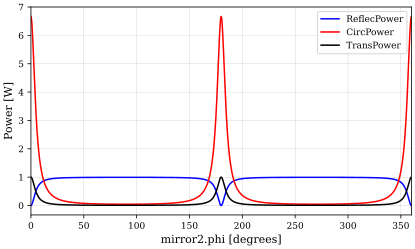

{finesse.detectors.powerdetector.PowerDetector: <Figure size 576x355.968 with 1 Axes>,
 'ReflecPower': <Figure size 576x355.968 with 1 Axes>,
 'CircPower': <Figure size 576x355.968 with 1 Axes>,
 'TransPower': <Figure size 576x355.968 with 1 Axes>}

In [8]:
import finesse
finesse.configure(plotting=True)
model=finesse.Model()
model.parse("""
l laser P=1 f=0
s space laser.p1 mirror1.p1 L=1E-3
m mirror1 R=0.85 T=0.15
s cavity mirror1.p2 mirror2.p1 L=3000
m mirror2 R=0.85 T=0.15
pd ReflecPower mirror1.p1.o
pd CircPower mirror2.p1.i
pd TransPower mirror2.p2.o
xaxis(mirror2.phi,lin,0,360,1000)
""")
res=model.run()
res.plot()

The behaviour of the cavity depends strongly on its tuning. It is resonant periodically every 180$^\circ$, i.e. a position change of $\lambda_0/2$ or a round-trip path length change of $\lambda_0$, as expected.

<div style="background-color:#cceffc;padding:10px;">

### Task 3: simulate the response of the cavity as the laser frequency is varied
1. Repeat the task above, this time scanning the frequency of the laser instead of the tuning of a mirror. Set the frequency range so that your plot shows a few resonances of the cavity.


2.  Extract the Free Spectral Range of this cavity from the modelled data. 

**Tip:** The Scipy package has a function for detecting multiple peaks called `scipy.signal.find_peaks_cwt`, which you might find useful
</div>


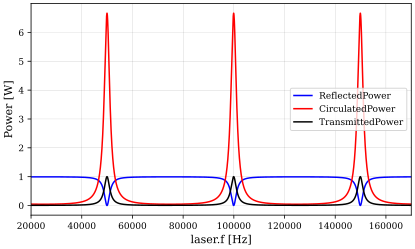

FSR= 49965 Hz


In [9]:
import finesse
import numpy as np
a=[]
c=[]
finesse.configure(plotting=True)
model2=finesse.Model()
model2.parse("""
l laser P=1 f=0
s space laser.p1 m1.p1 L=1E-3
m m1 R=0.85 T=0.15
s cavity m1.p2 m2.p1 L=3000
m m2 R=0.85 T=0.15 
pd ReflectedPower m1.p1.o
pd CirculatedPower m2.p1.i
pd TransmittedPower m2.p2.o
xaxis(laser.f,lin,20k,170k,10000)
""")
re=model2.run()
re.plot()
for i in range(10001):
    a.append(re["CirculatedPower"][i])
b=sorted(a)
for i in range(1,4):
    c.append(a.index(b[10001-i]))
FSR=(c[0]-c[1])*15
print("FSR=",FSR,"Hz")

<div style="background-color:#cceffc;padding:10px;">

### Task 4: Cavity types
In the above model, $T_1=T_2$ so the cavity is called 'impedence matched'. Fabry-Perot cavities and cavity couplings are covered in <a href=https://link.springer.com/article/10.1007/s41114-016-0002-8#Sec33>Section 5.1</a> of Interferometer Techniques. 

Run three simulations to show how the reflected, transmitted, and circulating cavity powers vary with microscopic tuning for:
1. impedance matched cavity ($T_1 = T_2$)
2. overcoupled cavity ($R_1 < R_2$)
3. undercoupled cavity ($R_1 > R_2$)

**Hint:** You might find the `kat.m2.setRTL(R, T, L)` method for changing the mirror parameters useful.
   
What interesting feature does an impedance matched cavity have?
 
In gravitational wave detectors we typically want very high optical powers, Is an over and under coupled cavity better for getting a higher circulating power in the cavity?
</div>


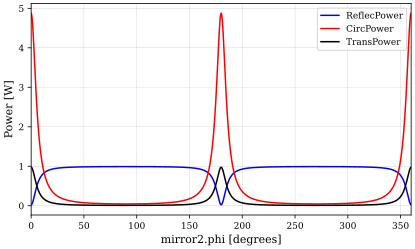

{finesse.detectors.powerdetector.PowerDetector: <Figure size 576x355.968 with 1 Axes>,
 'ReflecPower': <Figure size 576x355.968 with 1 Axes>,
 'CircPower': <Figure size 576x355.968 with 1 Axes>,
 'TransPower': <Figure size 576x355.968 with 1 Axes>}

In [10]:
model.mirror2.R=0.8
model.mirror2.T=0.2
model.parse("xaxis(mirror2.phi,lin,0,360,1000)")
res=model.run()
res.plot()

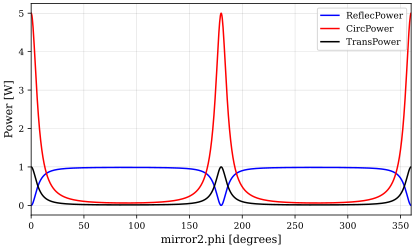

{finesse.detectors.powerdetector.PowerDetector: <Figure size 576x355.968 with 1 Axes>,
 'ReflecPower': <Figure size 576x355.968 with 1 Axes>,
 'CircPower': <Figure size 576x355.968 with 1 Axes>,
 'TransPower': <Figure size 576x355.968 with 1 Axes>}

In [11]:
model.mirror1.R=0.8
model.mirror1.T=0.2
model.parse("xaxis(mirror2.phi,lin,0,360,1000)")
res=model.run()
res.plot()

The power buildup is high in an impedance matched cavity. 

<div style="background-color:#cceffc;padding:10px;">
    
### Task 5: Frequency response, FWHM, and finesse

This task is about used modelled data to extract some cavity parameters. You should experiment with ways to achieve this task.

Use an overcoupled Fabry-Perot cavity Finesse model with R=1 and T=0 for the end mirror:

1. Plot the power circulating in the cavity as a function of the input laser frequency. You should change the laser frequency by at least two Free Spectral Ranges of the cavity.


2. Using this data, compute the cavity's full-width-half-maximum and finesse. Compare these results to analytic solutions. There isn't one specific way to do this task, you should experiment and problem solve!
</div>



Full Width Half Maximum: 1293 Hz
Modelled Finesse: 38.64269141531322
Calculated Finesse: 40.25331978158252


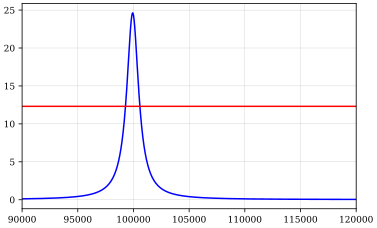

In [12]:
import matplotlib.pyplot as plt
#Scanning the laser frequency offset about 100kHz
model2.parse("xaxis(laser.f,lin,90k,120k,10000)")
model2.m2.R=1
re=model2.run()
a=[]
b=[]
c=[]
#Creating an array of CirculatedPower values
for i in range(10001):
    a.append(re["CirculatedPower"][i])
#Creating an array of laser.f values
for i in range(10001):
    c.append(90000+3*i)
#Plotting a horizontal line whose Circulated power is half of the maximum power, along with Circulated Power at different f
plt.plot(c,re["CirculatedPower"])
plt.axhline(y=max(a)/2, color='r')
#Searching for points in the neighbourhood of the half maximum
for i in range(10001):
    if abs(a[i]-0.5*max(a))<=0.04:
        b.append(a[i])
FWHM=(a.index(b[1])-a.index(b[0]))*3
print("Full Width Half Maximum:",FWHM,"Hz")
print("Modelled Finesse:", FSR/FWHM)
print("Calculated Finesse:", np.pi/(1-np.sqrt(0.85)))